In [34]:
import numpy as np
import scipy as sp
import suite2p as s2p
import TwoPUtils
import os
from matplotlib import pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
mouse = "GRABDA7"
basedir = os.path.join("/mnt/BigDisk", "2P_scratch", mouse)

date = "10_12_2020"
scene = "NeuroMods_LocationA"
sess = 3 
scan = 1

s2p_dir = os.path.join(basedir,date,scene,"%s_%03d_%03d" %(scene, sess, scan), "suite2p", "plane0")
figdir = os.path.join("/home/mplitt/Fig_scratch/InVivoDA",mouse)
os.makedirs(figdir,exist_ok=True)

In [44]:
ops = np.load(os.path.join(s2p_dir,"ops.npy"),allow_pickle=True).all()
stats = np.load(os.path.join(s2p_dir,"stat.npy"),allow_pickle=True)
iscell = np.load(os.path.join(s2p_dir,"iscell.npy"),allow_pickle=True)

In [45]:
iscell

array([[1.        , 0.97893742],
       [0.        , 0.77257764],
       [1.        , 0.96888864],
       ...,
       [1.        , 0.9370642 ],
       [1.        , 0.9493428 ],
       [1.        , 0.96016508]])

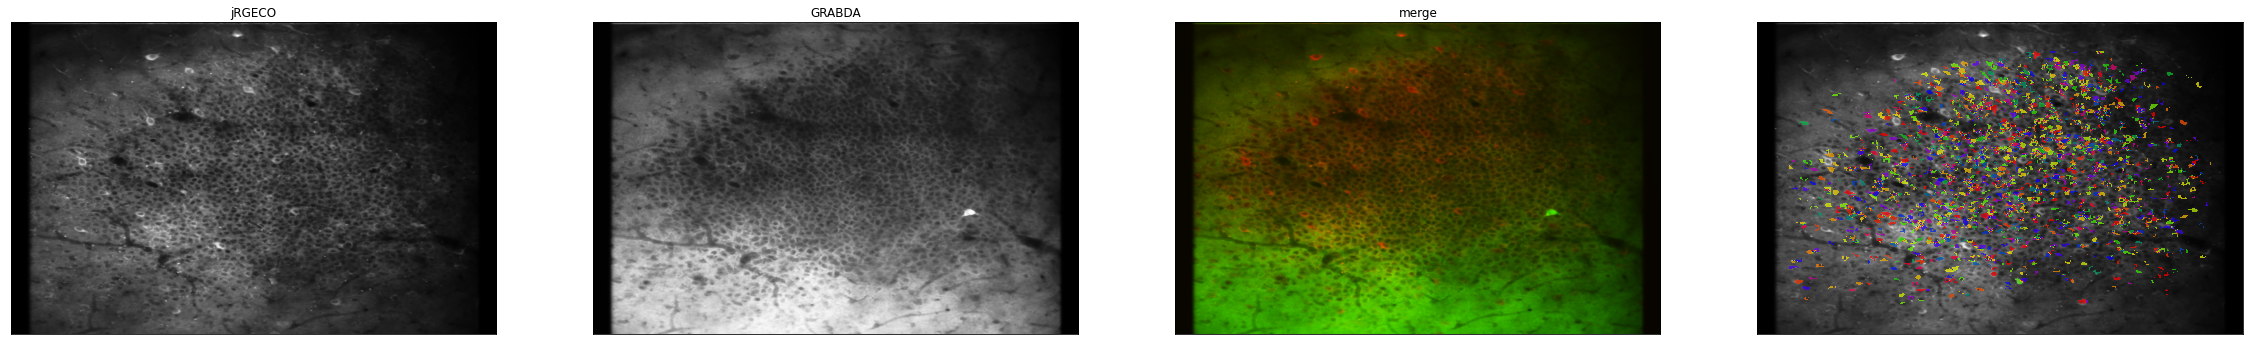

In [55]:
f,ax = plt.subplots(1,4,figsize=[40,10])
ax[0].imshow(ops['meanImg'],cmap="Greys_r")
ax[0].set_title("jRGECO")
ax[1].imshow(ops['meanImg_chan2'],cmap="Greys_r")
ax[1].set_title("GRABDA")

img = np.zeros([*ops['meanImg'].shape,3])
img[:,:,0]=ops['meanImg']/np.amax(ops['meanImg'].ravel())
img[:,:,1]=ops['meanImg_chan2']/np.amax(ops['meanImg_chan2'].ravel())*.9
ax[2].imshow(img)
ax[2].set_title("merge")

masks = np.zeros(ops['meanImg'].shape)
masks[:]=np.nan
for i in range(stats.shape[0]):
    if iscell[i,0]>0:
        stat = stats[i]
        masks[stat['ypix'],stat['xpix']]=np.float(i)/np.float(stats.size)
ax[3].imshow(ops['meanImg'],cmap="Greys_r")
ax[3].imshow(masks,alpha=.7,cmap='prism')

# ax[0].imshow(masks,cmap='prism')

for i in range(4):
    ax[i].set_xticks([])
    ax[i].set_yticks([])

f.savefig(os.path.join(figdir,"eg_mean.pdf"),format='pdf')

In [53]:
!rclone copy {figdir} gdrive:/InVivoDA/figures/{mouse}/

In [31]:
stats[0]


2.0